Este colab fue desarrollado por Arnold Charry Armero.

# Travelling Salesman Problem (TSP)

El problema del agente viajero se aplica en logistíca de manera que un vendedor debe de atender a $n$ clientes ubicados en ciudades diferentes pasando una sola vez por cada uno de ellos de manera que se minimice la distancia que recorre. Este es un problema que alcanza una complejidad alta del tipo NP-Hard a medida que el problema crece en dificultad. En esta ocasión, se resolverán dos ejemplos de forma micro para el problema del agente viajero para que se pueda observar su aplicación directa y se obtenga una mejor comprensión.

## Conjuntos

$ i = \text{nodo }i$

$ j = \text{nodo }j$

## Parámetros

$ d_{ij} = \text{Distancia del nodo }i \text{ al nodo } j$

$ c_{ij} = \text{1 si se puede transportar del nodo }i \text{ al nodo } j, \text{ 0 lo contrario}$

$ n = \text{Número de puntos o ciudades a visitar} $

## Variables de decisión

$ x_{ij} = \text{1 si se va del nodo } i \text{ al nodo } j, \text{0 lo contrario}$

$ u_{i} = \text{variable de eliminación de subtour } i $

$ u_{j} = \text{variable de eliminación de subtour } j $

## Función Objetivo

$\text{ f.o. } $

$$ \text{min} \: z = \sum_{i}^{} \sum_{j}^{} d_{ij}\: c_{ij} \:x_{ij} $$



## Restricciones

$\text{ s.a. } $

$$ \sum_{i}^{} x_{ij}\: c_{ij} = 1, \: \forall j $$

$$ \sum_{j}^{} x_{ij}\: c_{ij} = 1, \: \forall i $$

Eliminación de los subtours,

$$ u_{i} - u_{j} + (n-1) \:x_{ij} \: c_{ij} \leq n - 2; i = 2, \cdots , n; j = 2, \cdots , n$$

$$ 1 \leq u_{i} \leq n - 1; i = 2, \cdots, n$$

Ahora se continua con la implementación en código resolviéndo el siguiente ejemplo,

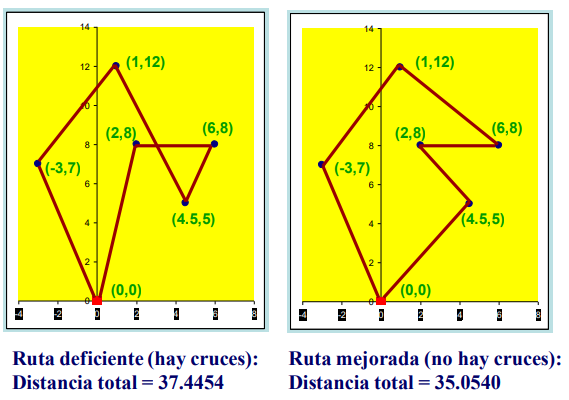

In [ ]:
# Primero se van a calcular las distancias entre cada punto teniendo cada uno
P1 = [0, 0]
P2 = [-3, 7]
P3 = [1, 12]
P4 = [2, 8]
P5 = [4.5, 5]
P6 = [6, 8]
Puntos = [P1, P2, P3, P4, P5, P6]

In [ ]:
# Se define la función para calcular distancias
def distance_points(x1, y1, x2, y2):
  import numpy as np
  distance = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
  return distance

In [ ]:
#Se instala la libreria
!pip install pulp

In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
nodos1 = range(6)
nodos2 = range(6)

In [ ]:
#Parámetros

n = 6

d = []
for i in nodos1:
  d.append([])
  for j in nodos2:
    value = distance_points(Puntos[i][0], Puntos[i][1], Puntos[j][0], Puntos[j][1])
    d[i].append(value)

c = []

for i in nodos1:
  c.append([])
  for j in nodos2:
    if d[i][j] > 0:
      c[i].append(1)
    else:
      c[i].append(0)

#Matriz c
print("----Matriz c----")
for i in range(6):
  for j in range(6):
    print(c[i][j], end = "  " if c[i][j] >= 0 and c[i][j] < 10 else " ")
  print("")

----Matriz c----
0  1  1  1  1  1  
1  0  1  1  1  1  
1  1  0  1  1  1  
1  1  1  0  1  1  
1  1  1  1  0  1  
1  1  1  1  1  0  


In [ ]:
#Se crea la instancia del modelo
model = LpProblem(name = "Travelling_Salesman_Problem", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (nodos1, nodos2), 0, 1, LpInteger)
U = LpVariable.dicts("U", (range(2, n + 1)), 1, 5, LpInteger)

#Se agrega la función objetivo
model += lpSum([[d[i][j] * c[i][j] * X[i][j] for i in nodos1] for j in nodos2])

#Restricciones

#Debe salir y entrar de la misma manera
for j in nodos2:
  model += lpSum([X[i][j] * c[i][j] for i in nodos1]) == 1

for i in nodos1:
  model += lpSum([X[i][j] * c[i][j] for j in nodos2]) == 1

#Eliminación de subtours
for i in range(2, n):
  for j in range(2, n):
    model += U[i] - U[j] + (n - 1) * X[i][j] * c[i][j] <= n - 2

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Distancia total =", model.objective.value())

Status Optimal
U_2 = 4.0
U_3 = 3.0
U_4 = 1.0
U_5 = 2.0
X_0_1 = 0.0
X_0_2 = 0.0
X_0_3 = 0.0
X_0_4 = 1.0
X_0_5 = 0.0
X_1_0 = 1.0
X_1_2 = 0.0
X_1_3 = 0.0
X_1_4 = 0.0
X_1_5 = 0.0
X_2_0 = 0.0
X_2_1 = 1.0
X_2_3 = 0.0
X_2_4 = 0.0
X_2_5 = 0.0
X_3_0 = 0.0
X_3_1 = 0.0
X_3_2 = 1.0
X_3_4 = 0.0
X_3_5 = 0.0
X_4_0 = 0.0
X_4_1 = 0.0
X_4_2 = 0.0
X_4_3 = 0.0
X_4_5 = 1.0
X_5_0 = 0.0
X_5_1 = 0.0
X_5_2 = 0.0
X_5_3 = 1.0
X_5_4 = 0.0
Distancia total = 32.22291695870096


In [ ]:
#Viéndo sólo las variables que dan 1
for i in nodos1:
  for j in nodos2:
    if X[i][j].value() == 1:
      print(X[i][j], "=", X[i][j].value())

X_0_4 = 1.0
X_1_0 = 1.0
X_2_1 = 1.0
X_3_2 = 1.0
X_4_5 = 1.0
X_5_3 = 1.0


In [ ]:
# Construir el tour óptimo
tour = [0]  # Comenzamos desde la ciudad 0
current_city = 0

while len(tour) < n + 1:
    for j in nodos2:
        if X[current_city][j].value() == 1:
            tour.append(j)
            current_city = j
            break

# Imprimir el tour en orden
print("Tour ordenado:", tour)

Tour ordenado: [0, 4, 5, 3, 2, 1, 0]


In [ ]:
# Reorganizar los puntos según el tour
tour_puntos = [Puntos[i] for i in tour]
tour_puntos

[[0, 0], [4.5, 5], [6, 8], [2, 8], [1, 12], [-3, 7], [0, 0]]

Dando la ruta óptima,

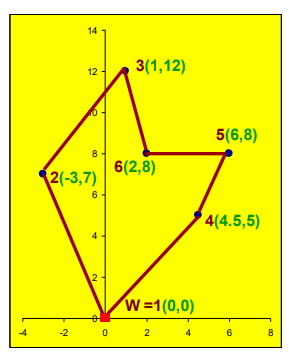

Gráficandolo con Python,

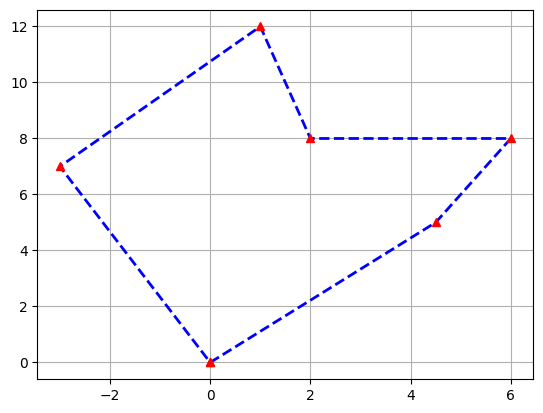

In [ ]:
x = [tour_puntos[i][0] for i in range(n+1)]
y = [tour_puntos[i][1] for i in range(n+1)]
import matplotlib.pyplot as plt
plt.plot(x, y, marker='>', mfc='r', mec='r', ms=6, ls='--', c='b', lw=2)
plt.grid()

Ahora se procede con el segundo ejemplo, teniendo los puntos siguientes:

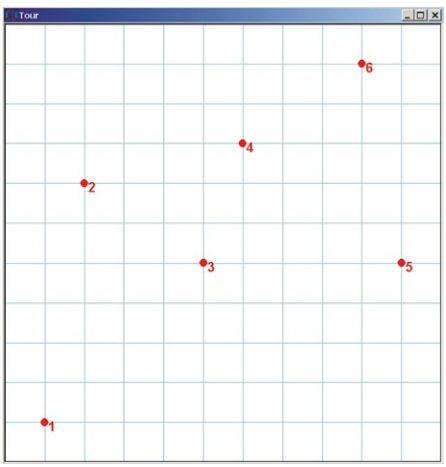

Y las siguientes coordenadas,


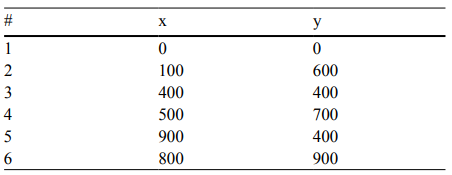

In [ ]:
# Primero se van a calcular las distancias entre cada punto teniendo cada uno
P1 = [0, 0]
P2 = [100, 600]
P3 = [400, 400]
P4 = [500, 700]
P5 = [900, 400]
P6 = [800, 900]
Puntos = [P1, P2, P3, P4, P5, P6]

In [ ]:
# Se define la función para calcular distancias
def distance_points2(x1, y1, x2, y2):
  import numpy as np
  distance = round(np.sqrt((x1 - x2)**2 + (y1 - y2)**2))
  return distance

In [ ]:
#Se importa la libreria
from pulp import *

In [ ]:
#Conjuntos
nodos1 = range(6)
nodos2 = range(6)

In [ ]:
#Parámetros

n = 6

d = []
for i in nodos1:
  d.append([])
  for j in nodos2:
    value = distance_points2(Puntos[i][0], Puntos[i][1], Puntos[j][0], Puntos[j][1])
    d[i].append(value)

c = []

for i in nodos1:
  c.append([])
  for j in nodos2:
    if d[i][j] > 0:
      c[i].append(1)
    else:
      c[i].append(0)

#Matriz c
print("----Matriz c----")
for i in range(6):
  for j in range(6):
    print(c[i][j], end = "  " if c[i][j] >= 0 and c[i][j] < 10 else " ")
  print("")

----Matriz c----
0  1  1  1  1  1  
1  0  1  1  1  1  
1  1  0  1  1  1  
1  1  1  0  1  1  
1  1  1  1  0  1  
1  1  1  1  1  0  


In [ ]:
#Matriz d
print("----Matriz d----")
for i in range(6):
  for j in range(6):
    print(d[i][j], end = "  " if d[i][j] >= 0 and d[i][j] < 10 else " ")
  print("")

----Matriz d----
0  608 566 860 985 1204 
608 0  361 412 825 762 
566 361 0  316 500 640 
860 412 316 0  500 361 
985 825 500 500 0  510 
1204 762 640 361 510 0  


In [ ]:
#Se crea la instancia del modelo
model = LpProblem(name = "Travelling_Salesman_Problem2", sense = LpMinimize)

#Inicialización de las variables de decisión
X = LpVariable.dicts("X", (nodos1, nodos2), 0, 1, LpInteger)
U = LpVariable.dicts("U", (range(2, n + 1)), 1, 5, LpInteger)

#Se agrega la función objetivo
model += lpSum([[d[i][j] * c[i][j] * X[i][j] for i in nodos1] for j in nodos2])

#Restricciones

#Debe salir y entrar de la misma manera
for j in nodos2:
  model += lpSum([X[i][j] * c[i][j] for i in nodos1]) == 1

for i in nodos1:
  model += lpSum([X[i][j] * c[i][j] for j in nodos2]) == 1

#Eliminación de subtours
for i in range(2, n):
  for j in range(2, n):
    model += U[i] - U[j] + (n - 1) * X[i][j] * c[i][j] <= n - 2

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Distancia total =", model.objective.value())

Status Optimal
U_2 = 4.0
U_3 = 1.0
U_4 = 3.0
U_5 = 2.0
X_0_1 = 1.0
X_0_2 = 0.0
X_0_3 = 0.0
X_0_4 = 0.0
X_0_5 = 0.0
X_1_0 = 0.0
X_1_2 = 0.0
X_1_3 = 1.0
X_1_4 = 0.0
X_1_5 = 0.0
X_2_0 = 1.0
X_2_1 = 0.0
X_2_3 = 0.0
X_2_4 = 0.0
X_2_5 = 0.0
X_3_0 = 0.0
X_3_1 = 0.0
X_3_2 = 0.0
X_3_4 = 0.0
X_3_5 = 1.0
X_4_0 = 0.0
X_4_1 = 0.0
X_4_2 = 1.0
X_4_3 = 0.0
X_4_5 = 0.0
X_5_0 = 0.0
X_5_1 = 0.0
X_5_2 = 0.0
X_5_3 = 0.0
X_5_4 = 1.0
Distancia total = 2957.0


In [ ]:
#Viéndo sólo las variables que dan 1
for i in nodos1:
  for j in nodos2:
    if X[i][j].value() == 1:
      print(X[i][j], "=", X[i][j].value())

X_0_1 = 1.0
X_1_3 = 1.0
X_2_0 = 1.0
X_3_5 = 1.0
X_4_2 = 1.0
X_5_4 = 1.0


In [ ]:
# Construir el tour óptimo
tour = [0]  # Comenzamos desde la ciudad 0
current_city = 0

while len(tour) < n + 1:
    for j in nodos2:
        if X[current_city][j].value() == 1:
            tour.append(j)
            current_city = j
            break

# Imprimir el tour en orden
print("Tour ordenado:", tour)

Tour ordenado: [0, 1, 3, 5, 4, 2, 0]


In [ ]:
# Reorganizar los puntos según el tour
tour_puntos = [Puntos[i] for i in tour]
tour_puntos

[[0, 0], [100, 600], [500, 700], [800, 900], [900, 400], [400, 400], [0, 0]]

Graficándolo en Python,

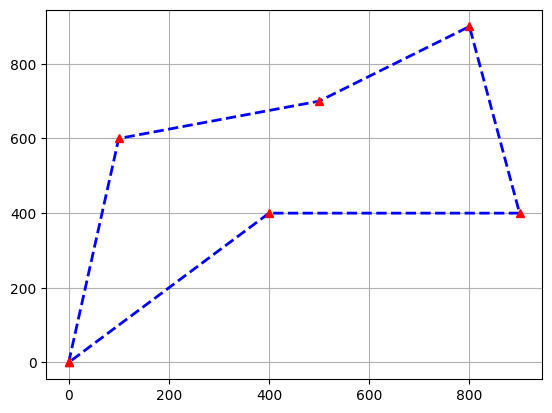

In [ ]:
x = [tour_puntos[i][0] for i in range(n+1)]
y = [tour_puntos[i][1] for i in range(n+1)]
import matplotlib.pyplot as plt
plt.plot(x, y, marker='^', mfc='r', mec='r', ms=6, ls='--', c='b', lw=2)
plt.grid()